In [1]:
!pip install gdown

In [2]:
import os
import zipfile
import gdown

# List of file IDs (from google drive that stores our dataset)
file_ids = [
    '1pF2dgzRh5bv7N6CtnNbxSdTY96-WtscQ',
    '1_AnxC-HX0cONqzx6iieZ-jVuUfeBGikv',
    '1NPUlNQ72xjnu0EYWWbThB72UFSsTtrDL',
    '1qdo1P-FaShwrf8uAtVganaOK1jPpproM',
    '1EypHEU0fZHWQECoNCxpmgRHWRlsB9_eA',
    '18-vCtuExrjNObIbwSoskgBf59vOK1Hhv'
]

# Folder to store downloaded ZIP files
zip_folder = 'zip_files'
os.makedirs(zip_folder, exist_ok=True)

# Folder to extract all ZIP files
extract_to = 'extracted_images'
os.makedirs(extract_to, exist_ok=True)

# download and extract all ZIP files from our google drive
for i, file_id in enumerate(file_ids, 1):
    zip_path = os.path.join(zip_folder, f'file_{i}.zip') # each ZIP file will be stored as file_#.zip

    # downloading file from google drive
    gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_path, quiet=False)

    # Extract the downloaded ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

print(f"Done, stored in {extract_to}")

Downloading...
From (original): https://drive.google.com/uc?id=1pF2dgzRh5bv7N6CtnNbxSdTY96-WtscQ
From (redirected): https://drive.google.com/uc?id=1pF2dgzRh5bv7N6CtnNbxSdTY96-WtscQ&confirm=t&uuid=52be8ea1-aad9-41e0-ade4-4da343bc31f2
To: /content/zip_files/file_1.zip
100%|██████████| 603M/603M [00:07<00:00, 75.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_AnxC-HX0cONqzx6iieZ-jVuUfeBGikv
From (redirected): https://drive.google.com/uc?id=1_AnxC-HX0cONqzx6iieZ-jVuUfeBGikv&confirm=t&uuid=9e9fb2c8-1d86-4a25-b2e0-a44c7abb73e8
To: /content/zip_files/file_2.zip
100%|██████████| 348M/348M [00:02<00:00, 162MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1NPUlNQ72xjnu0EYWWbThB72UFSsTtrDL
From (redirected): https://drive.google.com/uc?id=1NPUlNQ72xjnu0EYWWbThB72UFSsTtrDL&confirm=t&uuid=647e7381-235a-436f-b761-eb2effb0158c
To: /content/zip_files/file_3.zip
100%|██████████| 3.21G/3.21G [00:30<00:00, 104MB/s]
Downloading...
From (original): https://drive.

Done, stored in extracted_images


In [3]:
main_folder = extract_to

image_extensions = {'.jpg', '.jpeg', '.png'}

image_counts = {}

# Loop through each episode folder (e.g., S1E5)
for episode_folder in os.listdir(main_folder):
    episode_path = os.path.join(main_folder, episode_folder)

    if os.path.isdir(episode_path):
        image_counts[episode_folder] = {'With_Peter': 0, 'Without_Peter': 0}

        for subfolder in ['With_Peter', 'Without_Peter']:
            subfolder_path = os.path.join(episode_path, subfolder)

            if os.path.isdir(subfolder_path):
                image_count = sum(
                    1 for file_name in os.listdir(subfolder_path)
                    if os.path.splitext(file_name)[1].lower() in image_extensions
                )

                image_counts[episode_folder][subfolder] = image_count

for episode, counts in image_counts.items():
    print(f"Episode '{episode}':")
    print(f"  With_Peter: {counts['With_Peter']} images")
    print(f"  Without_Peter: {counts['Without_Peter']} images")

Episode 'S5E05':
  With_Peter: 2056 images
  Without_Peter: 3008 images
Episode 'S5E16':
  With_Peter: 937 images
  Without_Peter: 1572 images
Episode '__MACOSX':
  With_Peter: 0 images
  Without_Peter: 0 images
Episode 'S1E05':
  With_Peter: 1192 images
  Without_Peter: 1595 images
Episode 'S3E10':
  With_Peter: 2640 images
  Without_Peter: 2364 images
Episode 'S2E01':
  With_Peter: 398 images
  Without_Peter: 453 images
Episode 'S1E5':
  With_Peter: 1192 images
  Without_Peter: 1596 images
Episode '.ipynb_checkpoints':
  With_Peter: 0 images
  Without_Peter: 0 images
Episode 'S5E04':
  With_Peter: 2360 images
  Without_Peter: 3163 images


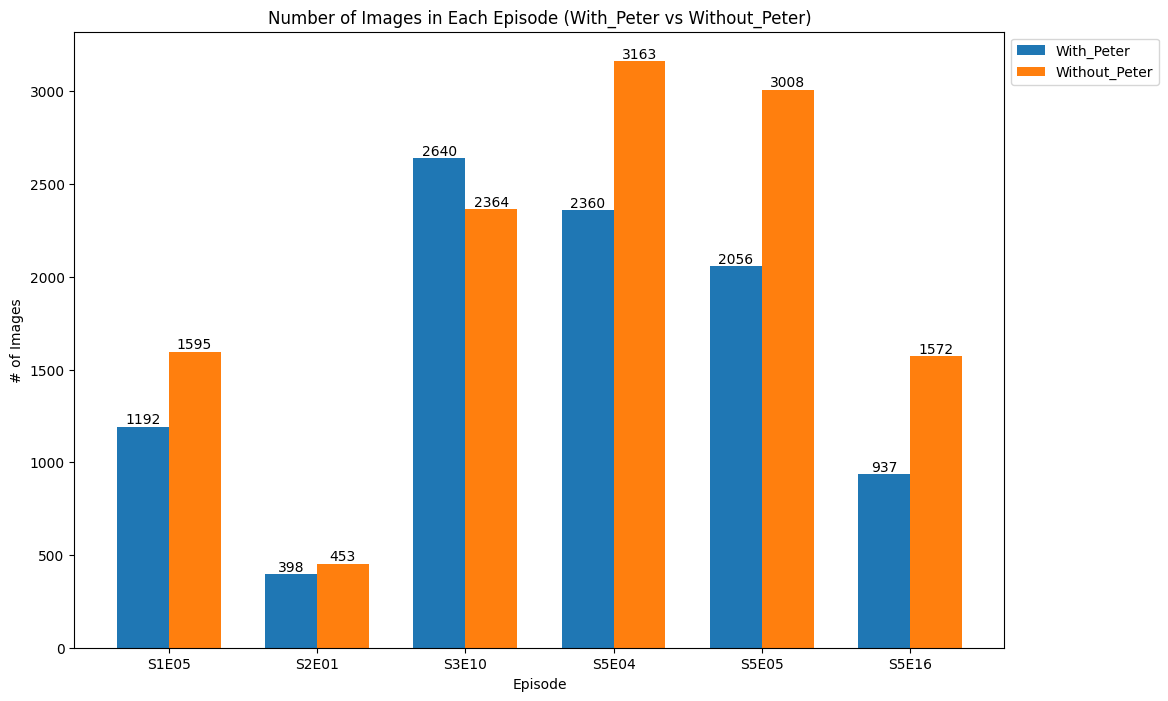

In [6]:
import matplotlib.pyplot as plt

episodes_temp = [episode for episode in image_counts.keys() if episode not in {'__MACOSX', '.ipynb_checkpoints'}]
episodes = sorted(episodes_temp)

with_peter_counts = [image_counts[episode]['With_Peter'] for episode in episodes]
without_peter_counts = [image_counts[episode]['Without_Peter'] for episode in episodes]

x = range(len(episodes))

plt.figure(figsize=(12, 8))

bars1 = plt.bar(x, with_peter_counts, width=0.35, label='With_Peter')

bars2 = plt.bar([pos + 0.35 for pos in x], without_peter_counts, width=0.35, label='Without_Peter')

plt.xlabel('Episode')
plt.ylabel('# of Images')
plt.title('Number of Images in Each Episode (With_Peter vs Without_Peter)')
plt.xticks([pos + 0.35 / 2 for pos in x], episodes)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

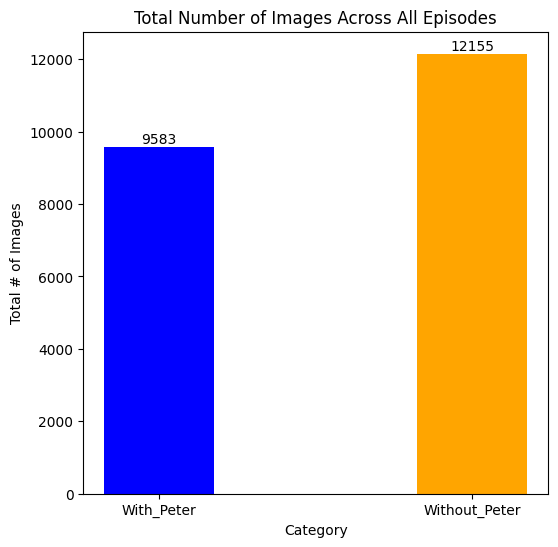

In [10]:
total_with_peter = sum(with_peter_counts)
total_without_peter = sum(without_peter_counts)

categories = ['With_Peter', 'Without_Peter']
total_counts = [total_with_peter, total_without_peter]

plt.figure(figsize=(4, 6))
bars = plt.bar(categories, total_counts, width=0.35, color=['blue', 'orange'])

plt.xlabel('Category')
plt.ylabel('Total # of Images')
plt.title('Total Number of Images Across All Episodes')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()